IMPORTING DATA AND DOWNLOADING LIBRARIES

In [ ]:
!pip install yfinance

In [1]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplfinance as mpf

In [10]:
cvx = yf.Ticker('CVX')
data = cvx.history(period='5y')

In [14]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-14 00:00:00-04:00,62.427924,62.830789,61.976712,62.274834,8182800,0.0,0.0
2020-09-15 00:00:00-04:00,62.492369,63.233644,61.203203,61.517437,11732000,0.0,0.0
2020-09-16 00:00:00-04:00,61.517442,64.039379,61.203208,63.298103,13019000,0.0,0.0
2020-09-17 00:00:00-04:00,62.468189,63.531752,61.533547,63.483410,10515100,0.0,0.0
2020-09-18 00:00:00-04:00,62.750213,63.773493,62.444038,63.016106,14517800,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-08 00:00:00-04:00,153.910004,155.029999,152.880005,154.000000,9462000,0.0,0.0
2025-09-09 00:00:00-04:00,154.910004,156.990005,154.600006,154.850006,7769200,0.0,0.0
2025-09-10 00:00:00-04:00,155.050003,157.919998,155.000000,157.789993,7440800,0.0,0.0


MINOR DATA CLEANING

In [22]:
data.index = pd.to_datetime(data.index)
data = data.dropna()
data = data.drop(columns=['Dividends','Stock Splits'], errors='ignore')

In [24]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-14 00:00:00-04:00,62.427924,62.830789,61.976712,62.274834,8182800
2020-09-15 00:00:00-04:00,62.492369,63.233644,61.203203,61.517437,11732000
2020-09-16 00:00:00-04:00,61.517442,64.039379,61.203208,63.298103,13019000
2020-09-17 00:00:00-04:00,62.468189,63.531752,61.533547,63.483410,10515100
2020-09-18 00:00:00-04:00,62.750213,63.773493,62.444038,63.016106,14517800
...,...,...,...,...,...
2025-09-08 00:00:00-04:00,153.910004,155.029999,152.880005,154.000000,9462000
2025-09-09 00:00:00-04:00,154.910004,156.990005,154.600006,154.850006,7769200
2025-09-10 00:00:00-04:00,155.050003,157.919998,155.000000,157.789993,7440800


In [26]:
data.index = data.index.tz_localize(None)


In [28]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-14,62.427924,62.830789,61.976712,62.274834,8182800
2020-09-15,62.492369,63.233644,61.203203,61.517437,11732000
2020-09-16,61.517442,64.039379,61.203208,63.298103,13019000
2020-09-17,62.468189,63.531752,61.533547,63.483410,10515100
2020-09-18,62.750213,63.773493,62.444038,63.016106,14517800
...,...,...,...,...,...
2025-09-08,153.910004,155.029999,152.880005,154.000000,9462000
2025-09-09,154.910004,156.990005,154.600006,154.850006,7769200
2025-09-10,155.050003,157.919998,155.000000,157.789993,7440800


In [30]:
data.describe()

,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,127.865455,129.147296,126.532379,127.855522,9.660553e+06
std,29.349985,29.531721,29.105605,29.315408,4.662038e+06
min,53.282887,54.854048,52.501334,53.887169,2.575987e+06
25%,99.948473,100.780945,99.227859,99.967844,6.980900e+06
50%,140.217890,141.807783,138.863027,140.365799,8.661600e+06
75%,149.419824,150.746488,147.939844,149.256256,1.067582e+07
max,165.524462,167.788990,164.692926,167.402115,5.723100e+07


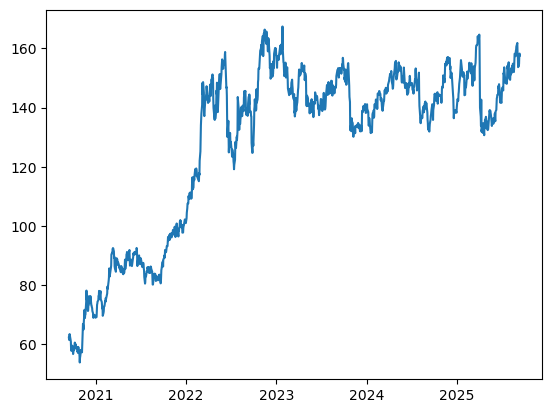

In [34]:
plt.plot(data.index, data['Close'], label = 'Close Price')

<BarContainer object of 1256 artists>

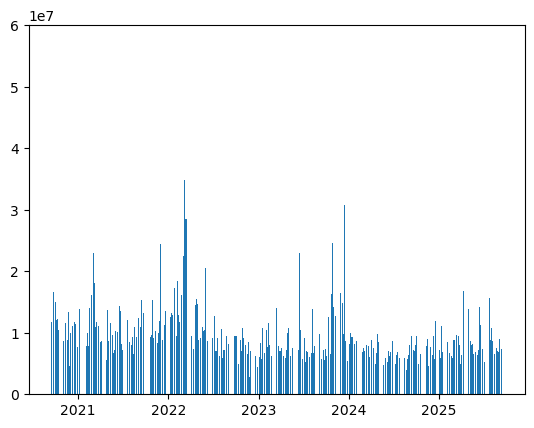

In [36]:
plt.bar(data.index, data['Volume'])

THE ABOVE CHARTS ARE FOR CLOSING PRICE AND VOLUMES RESPECTIVELY,
THE CLOSING PRICE HELPS US SPOT TRENDS📈
THE VOLUME BARS SHOWS US HOW MUCH TRADING HAPPENED📊

In [49]:
data['M-A50'] = data['Close'].rolling(50).mean()

In [51]:
data['M-A50']

Date
2020-09-14           NaN
2020-09-15           NaN
2020-09-16           NaN
2020-09-17           NaN
2020-09-18           NaN
                 ...    
2025-09-08    152.271867
2025-09-09    152.524728
2025-09-10    152.848257
2025-09-11    153.133910
2025-09-12    153.358094
Name: M-A50, Length: 1256, dtype: float64

In [53]:
data['M-A200'] = data['Close'].rolling(50).mean()

In [55]:
data['M-A200']

Date
2020-09-14           NaN
2020-09-15           NaN
2020-09-16           NaN
2020-09-17           NaN
2020-09-18           NaN
                 ...    
2025-09-08    152.271867
2025-09-09    152.524728
2025-09-10    152.848257
2025-09-11    153.133910
2025-09-12    153.358094
Name: M-A200, Length: 1256, dtype: float64

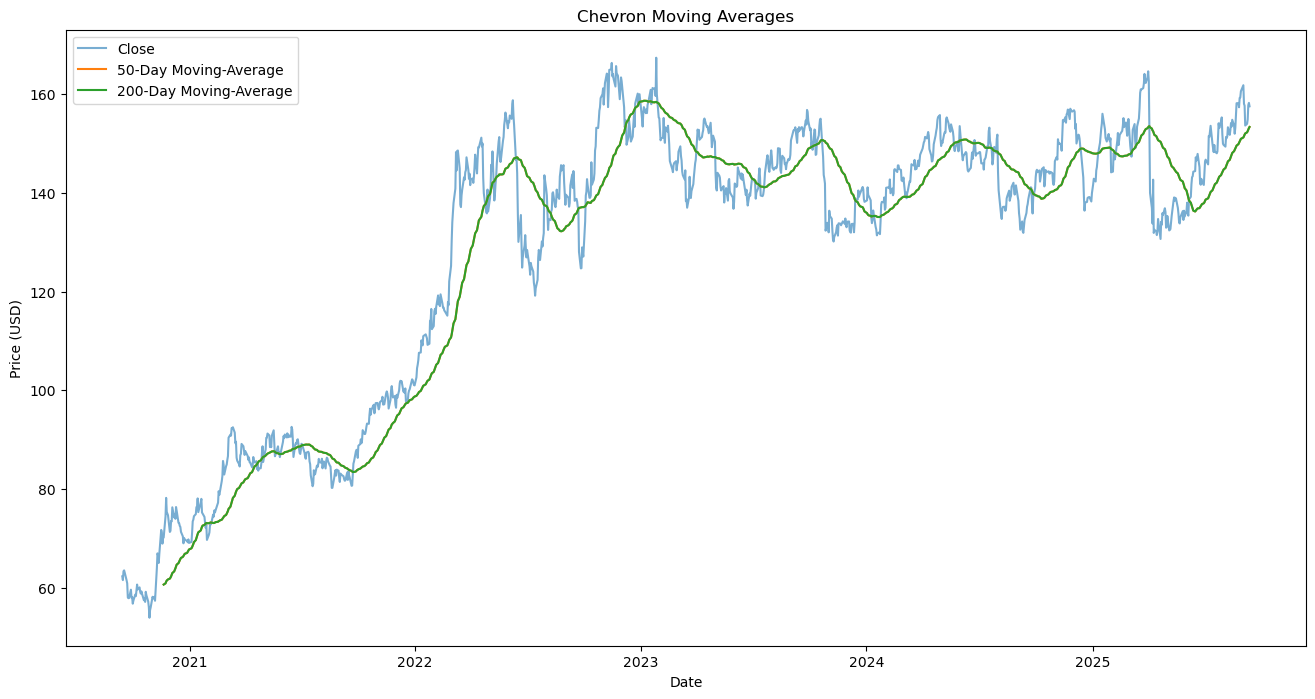

In [66]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close', alpha=0.6)
plt.plot(data['M-A50'], label='50-Day Moving-Average')
plt.plot(data['M-A200'], label='200-Day Moving-Average')
plt.title("Chevron Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend()
plt.show()

USING MOVING AVERAGE TO DETECT BULLISH AND BEARISH SIGNALS


In [58]:
data['Daily_Return'] = data['Close'].pct_change()

In [60]:
data['Daily_Return']

Date
2020-09-14         NaN
2020-09-15   -0.012162
2020-09-16    0.028946
2020-09-17    0.002928
2020-09-18   -0.007361
                ...   
2025-09-08    0.002213
2025-09-09    0.005520
2025-09-10    0.018986
2025-09-11    0.002915
2025-09-12   -0.004360
Name: Daily_Return, Length: 1256, dtype: float64

DONE TO CHECK THE DAILY RETURN OF THE INVESTMENT

In [69]:
data['Volatility'] = data['Daily_Return'].rolling(window=30).std()

In [71]:
data['Volatility']

Date
2020-09-14         NaN
2020-09-15         NaN
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
                ...   
2025-09-08    0.011256
2025-09-09    0.011172
2025-09-10    0.011666
2025-09-11    0.010854
2025-09-12    0.010592
Name: Volatility, Length: 1256, dtype: float64

THE VOLATLITY IS USED TO CREATE A STANDARD DEVIATION OF RETURNS A HIGHER VOLATILITY SIGNIFIES RISKY MARKET CONDITONS

<Axes: >

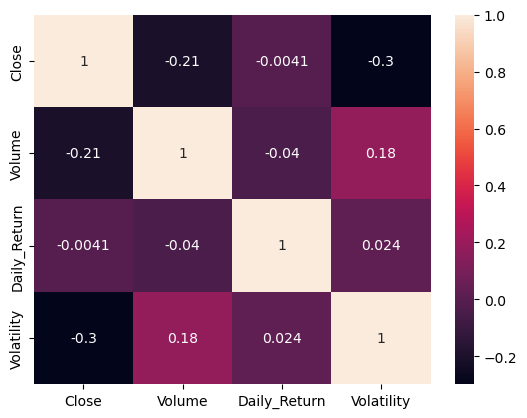

In [81]:
sb.heatmap(data[['Close','Volume','Daily_Return','Volatility']].corr(), annot=True)